## <font color = 'mediumblue'>6.5 Machine Learning Part 2</font>

### This script contains the following:

#### 1. Importing libraries and data and dropping columns
#### 2. The elbow technique
#### 3. k-means clustering

### <font color = 'darkorchid'>1. Importing libraries and data and dropping columns</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
#assigning path
path = r'/Users/ishitabhasin/Desktop/Career Foundary Tasks/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_choc_clean.csv'),index_col = False)

In [5]:
df.head()

,Unnamed: 0,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [6]:
#changing data type for Cocoa_percentage to numeric for ease of analysis
df['Cocoa_percentage'] = df['Cocoa_percentage'].str.replace('%','').astype(float)/100
df.head()

,Unnamed: 0,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


In [7]:
df.columns

Index(['Unnamed: 0', 'Company_name', 'Bar_origin', 'Ref', 'Review_date',
       'Cocoa_percentage', 'Company_location', 'Rating', 'Bean_origin'],
      dtype='object')

In [8]:
# dropping columns
df.drop(columns = ["Unnamed: 0","Company_name","Bar_origin","Ref","Company_location","Bean_origin"], axis=1, inplace = True)

In [9]:
df.head()

,Review_date,Cocoa_percentage,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50


### <font color = 'darkorchid'>2. The elbow technique</font>

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init="auto") for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-15789.176708857938,
 -4532.831320982331,
 -2221.553214182366,
 -1964.0182639841453,
 -1077.1707328354273,
 -841.6231709967294,
 -791.9044441771055,
 -638.2336276052798,
 -562.9185330980715]

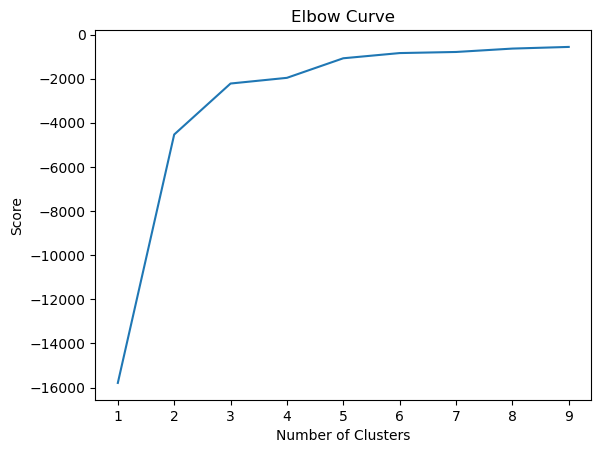

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### After the 3rd cluster, the line starts to straighten out so the optimal count for clusters is three.

### <font color = 'darkorchid'> 3. k-means clustering</font>

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_init="auto")

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [15]:
df['clusters'] = kmeans.fit_predict(df)

In [16]:
df.head()

,Review_date,Cocoa_percentage,Rating,clusters
0,2016,0.63,3.75,0
1,2015,0.70,2.75,0
2,2015,0.70,3.00,0
3,2015,0.70,3.50,0
4,2015,0.70,3.50,0


In [17]:
df['clusters'].value_counts()

0    775
2    544
1    476
Name: clusters, dtype: int64

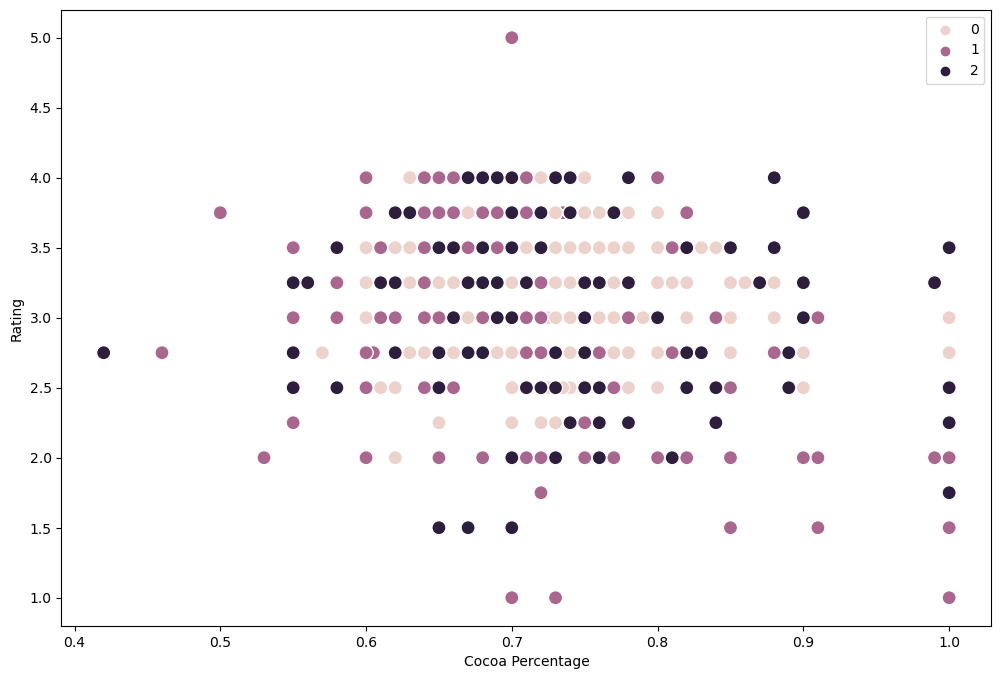

In [23]:
# Plot the clusters for the "Cocoa_percentage" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cocoa_percentage'], y=df['Rating'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa Percentage') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

* The <font color = 'indigo'>dark purple</font> cluster mostly represents the chocolate bars with lower than average cocoa percent and ranges from 2 - 4 in ratings. 
* The <font color = 'purple'>purple</font> cluster mostly represents the bars with higher than average cocoa percent and also ranges from 2 - 4 in ratings. 
* As for the <font color = 'palevioletred'>pink</font> cluster, it contains bars with a variety of cocoa percentages and ratings. 
* Overall, I would say the clusters do not make sense since the data points in the clusters are not consistent.

In [19]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [20]:
df.groupby('cluster').agg({'Cocoa_percentage':['mean', 'median'], 
                         'Rating':['mean', 'median']})

Cocoa_percentage           Rating       
                        mean median      mean median
cluster                                             
dark purple         0.716085    0.7  3.208180   3.25
pink                0.720032    0.7  3.224516   3.25
purple              0.713046    0.7  3.097689   3.00

* Looking at the statistics, I can see that the mean and median are similar for the clusters of "Cocoa_percentage" and "Rating". 
* These results does not provide much insight and therefore I need to explore the data further.